In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv("./shampoo.csv", header="infer")
df = df.drop(columns = ["Month"])
n_time_steps = df.shape[0]
print(n_time_steps)

36


In [14]:
df.columns

Index(['Sales'], dtype='object')

C:\Users\34665\AppData\Local\Temp\ipykernel_9320\896378776.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "c-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df.Sales, 'c-', linewidth=2, linestyle='-')


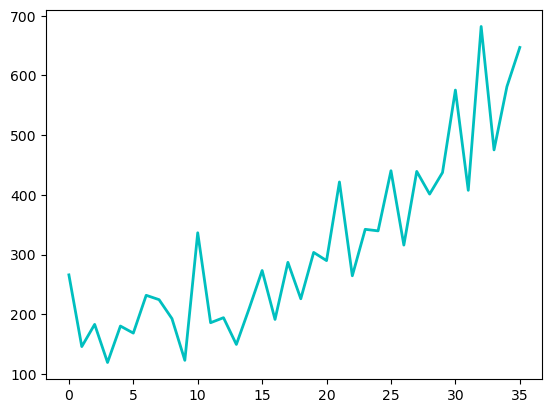

In [18]:
plt.plot(df.Sales, 'c-', linewidth=2, linestyle='-')

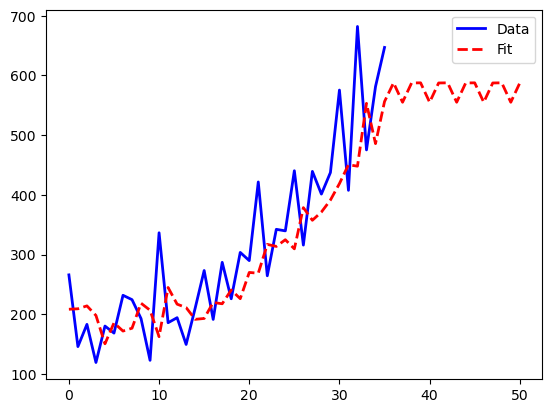

In [20]:
# Ajustar el modelo de suavizado exponencial
model = ExponentialSmoothing(df["Sales"], seasonal="mul", seasonal_periods=3).fit()

pred = model.predict(start=0, end=50)

plt.plot(df, c="b", linewidth=2, linestyle="-", label="Data")
plt.plot(pred, c="r", linewidth=2, linestyle="--", label="Fit")
plt.legend()
plt.show()

In [24]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [26]:
df_scaled2 = df_scaled.reshape(1, -1, 1)

In [30]:
epochs = 1000
bs = 1
neuronas = 100

In [34]:
model = Sequential()
model.add(SimpleRNN(neuronas, return_sequences=True, input_shape=(None, 1)))
model.add(Dense(1))

model.summary()

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, None, 100)           │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, None, 1)             │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [38]:
# df_scaled2[:,:-1,:]: Datos de entrada (todas las secuencias excepto la última)
# df_scaled2[:,1:,:]: Datos objetivo (todas las secuencias excepto la primera)
historico = model.fit(df_scaled2[:,:-1,:], df_scaled2[:,1:,:], epochs=epochs, batch_size=bs, verbose=0)

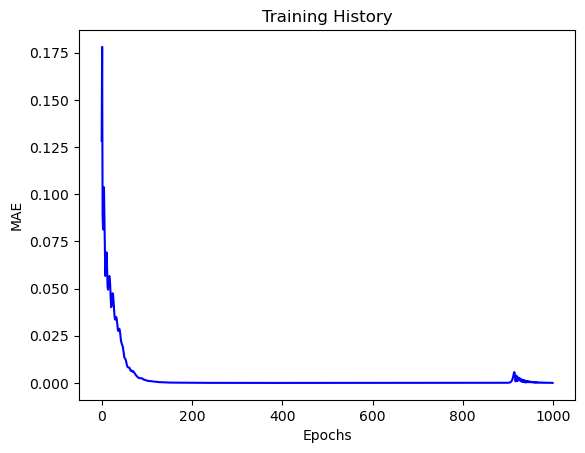

In [40]:
plt.plot(historico.history["mae"], c="b")
plt.title("Training History")
plt.ylabel("MAE")
plt.xlabel("Epochs")
plt.show()

In [42]:
# Valores iniciales y pasos de predicción
n_ts_seed = 5
n_prect_time_step = 55

# Primeros valores para la semilla
ts_seed = df_scaled[0:n_ts_seed]

# Generar predicciones
for i in range(n_prect_time_step):
   X = ts_seed.reshape(1,-1,1)
   y_pred = model.predict(X)
   y_last = y_pred[0,-1,0]
   
   ts_seed = np.concatenate((ts_seed, np.array([y_last]).reshape(1,1)), axis=0)

ts = scaler.inverse_transform(ts_seed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━

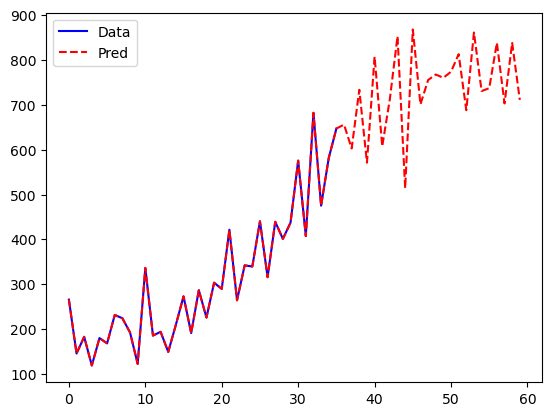

In [44]:
plt.plot(df.Sales, c="b", label="Data")       # Graficar datos originales en azul
plt.plot(ts, c="r", linestyle="--", label="Pred")    # Graficar predicciones en rojo punteado
plt.legend()
plt.show()  